<h1 align=center><font size = 5> Exercise: Desnity-based Clustering (DBSCAN) </font></h1>

## The problem
We would like to analyze kernels of wheat to find a method through which we can group kernels by size. We will first consider clustering by just the size of the kernel (kernel length and width), and then we will look at creating clusters based on all numerical variables in the dataset.
In this notebook, we will load and explore <font color = "green"> 'seeds.txt' </font> in R, which is a dataset containing measurements of geometrical properties of kernels belonging to three different varieties of wheat. 

The DBSCAN algorithm combines data points that are closely packed together into clusters based on the parameters **eps** and **minPts**. 

The **eps** parameter corresponds to the size of the neighborhood. 

The **minPts** parameter corresponds to the minimum number of points that must exist in this neighborhood to define it as a dense area. 

## Installing and loading the DBSCAN library and the data in R
We begin by installing the dbscan package and loading it along with the dataset .



In [10]:
# Installing the library 'dbscan'
install.packages("dbscan", dependencies = TRUE)
library('dbscan')

Warning message:
"package 'dbscan' is in use and will not be installed"

In [11]:
# Load data
seeds <- read.csv("https://ibm.box.com/shared/static/c1aw37ex3sx99pb9q2l8fwz643wnbeo6.txt", sep = "	")
head(seeds)

area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,type
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


## Creating a subset from the dataset


In [12]:
# Creating the subset: The subset contains the kernel width and the kernel length
seeds.sub <- subset(seeds, select = c(width,length))
head(seeds.sub)


width,length
3.312,5.763
3.333,5.554
3.337,5.291
3.379,5.324
3.562,5.658
3.312,5.386


## Using the dbscan function to obtain clusters
Use the dbscan function to obtain clusters and store them in clusters_assignments1  
For this exercise we will use eps = 0.8 and minPts = 4  
Note: You can change the values to see the formation of different clusters  
Noise points are assigned to cluster 0 by default  

In [5]:
clusters_assignments1 <- dbscan(seeds.sub, eps = .08, minPts = 4)
clusters_assignments1 

DBSCAN clustering for 210 objects.
Parameters: eps = 0.08, minPts = 4
The clustering contains 4 cluster(s) and 40 noise points.

  0   1   2   3   4 
 40 128   8   4  30 

Available fields: cluster, eps, minPts

## Converting the clusters to factors


In [6]:
# Clusters must be converted to factor before plotting in different colors
clusters_assignments1$cluster <- as.factor(clusters_assignments1$cluster)
head(clusters_assignments1$cluster)

[1] 1 1 2 2 0 2
Levels: 0 1 2 3 4

## Attaching the clusters to the measurements


In [7]:
# Combine the cluster assignments with the subset
seeds.sub$cluster_no <- clusters_assignments1$cluster
head(seeds.sub)

width,length,cluster_no
3.312,5.763,1
3.333,5.554,1
3.337,5.291,2
3.379,5.324,2
3.562,5.658,0
3.312,5.386,2


## Visualizing the results


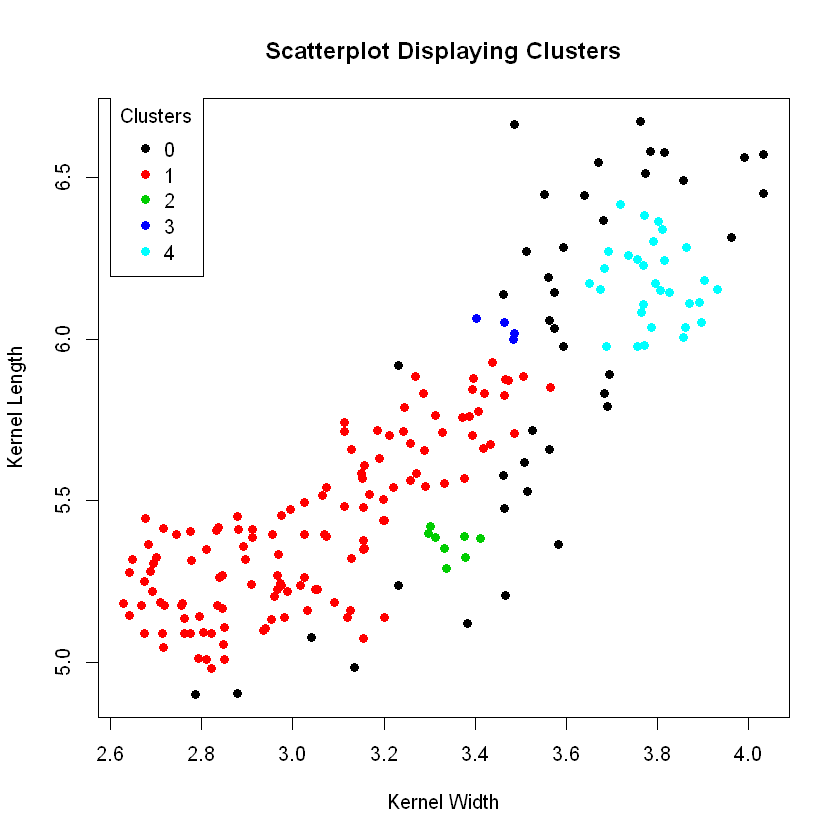

In [8]:
# Visualize results (noise is shown in black) using a simple plot
plot(seeds.sub$width, seeds.sub$length, col = clusters_assignments1$cluster, pch = 16, main = "Scatterplot Displaying Clusters", xlab = "Kernel Width", ylab = "Kernel Length")
legend(x = 2.6, y = 6.75, legend = levels(clusters_assignments1$cluster), col = c(1:5), pch = 16, title = "Clusters")

### References:

https://en.wikipedia.org/wiki/DBSCAN <br>
https://cran.r-project.org/web/packages/dbscan/dbscan.pdf <br>
https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf <br>
http://www.cse.buffalo.edu/~jing/cse601/fa12/materials/clustering_density.pdf <br>